In [335]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


# Read DATA

In [336]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [337]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [338]:
# ดูจำนวนค่า null ในแต่ละคอลัมน์
print(df.isnull().sum())
print(df.isnull().mean() * 100)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Custom

In [339]:
# ตรวจสอบจำนวนแถวที่ซ้ำทั้งหมด
print(df.duplicated().sum())
# แสดงแถวที่ซ้ำ
print(df[df.duplicated()])

0
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


In [340]:
# ตรวจสอบชนิดข้อมูลในแต่ละคอลัมน์
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [341]:
def get_category_data(df, categories):
    # คำจำกัดความของแต่ละหมวดหมู่
    category_columns = {
        'pp': [
            'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
            'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain'
        ],
        'prd': [
            'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
        ],
        'pmt': [
            'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2',
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'
        ],
        'pc': [
            'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth'
        ]
    }

    # ตรวจสอบว่า input เป็น list หรือ str
    if isinstance(categories, str):
        categories = [categories]

    # รวบรวมคอลัมน์ทั้งหมดจากหมวดหมู่ที่เลือก
    selected_columns = []
    for category in categories:
        if category not in category_columns:
            raise ValueError(f"Category '{category}' not found. Available categories: {list(category_columns.keys())}")
        selected_columns.extend(category_columns[category])

    # คืนค่าข้อมูลที่เลือกเฉพาะคอลัมน์ตามหมวดหมู่
    return df[selected_columns]


In [342]:
get_category_data(df, ['pp', 'prd', 'pmt','pc'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,...,0,0,0,0,0,1,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,...,0,0,0,0,0,0,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,...,0,0,0,0,0,0,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,...,0,0,0,0,0,0,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,...,0,0,0,0,0,0,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0,...,0,0,0,0,0,0,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0,...,1,0,0,0,0,0,8,2,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0,...,0,0,0,1,0,0,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0,...,0,0,0,0,0,0,6,5,10,3


In [343]:
# ดึงข้อมูลหมวด Products
get_category_data(df, 'pp')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0


## Data Cleaning

In [344]:
def preview_and_encode(df, columns, preview_only=True):
    """
    พรีวิวค่าที่ไม่ซ้ำในคอลัมน์ที่กำหนด และเลือกแปลงเป็นตัวเลข

    Parameters:
        df (pd.DataFrame): DataFrame ต้นทาง
        columns (list or str): คอลัมน์หรือรายการคอลัมน์ที่ต้องการดู/แปลง
        preview_only (bool): ถ้า True จะแค่พรีวิว, ถ้า False จะแปลงด้วย

    Returns:
        หาก preview_only=True: dict ของคอลัมน์และค่าที่ไม่ซ้ำ
        หาก preview_only=False: DataFrame ใหม่พร้อมคอลัมน์ที่ถูกแปลง
    """
    if isinstance(columns, str):
        columns = [columns]

    result = {}

    for col in columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

        unique_vals = df[col].dropna().unique().tolist()
        result[col] = unique_vals

        if not preview_only:
            df[col] = df[col].astype('category').cat.codes

    return result if preview_only else df


In [345]:
preview_and_encode(df, ['Education', 'Marital_Status'])


{'Education': ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'],
 'Marital_Status': ['Single',
  'Together',
  'Married',
  'Divorced',
  'Widow',
  'Alone',
  'Absurd',
  'YOLO']}

In [346]:
def simplify_marital_status(df, column='Marital_Status', new_column='Marital'):
    """
    แปลงค่าคอลัมน์ Marital_Status ให้อยู่ในกลุ่ม: โสด, แต่งงาน, หม้าย, อื่นๆ

    Parameters:
        df (pd.DataFrame): DataFrame ที่ใช้
        column (str): ชื่อคอลัมน์เดิม
        new_column (str): ชื่อคอลัมน์ใหม่ (สามารถแทนชื่อเดิมได้ถ้าต้องการ)

    Returns:
        DataFrame ใหม่พร้อมคอลัมน์ที่ถูกแปลง
    """
    mapping = {
        'Single': 'Single',
        'Alone': 'Single',
        'YOLO': 'Single',
        'Married': 'Together',
        'Together': 'Together',
        'Widow': 'Divorced',
        'Divorced': 'Divorced',
    }

    df[new_column] = df[column].map(mapping).fillna('Other')
    return df

In [347]:
df = simplify_marital_status(df)
print(df[['Marital_Status', 'Marital']].drop_duplicates())

     Marital_Status   Marital
0            Single    Single
2          Together  Together
4           Married  Together
6          Divorced  Divorced
38            Widow  Divorced
131           Alone    Single
2093         Absurd     Other
2177           YOLO    Single


In [348]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,Single
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,Single
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,Together
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,Together
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,Together
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,Together
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,Together
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,Divorced
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,Together


In [349]:
def preview_and_onehot_encode(df, columns, preview_only=True, drop_first=False):
    """
    พรีวิวค่าที่ไม่ซ้ำในคอลัมน์ และแปลงเป็น One-Hot Encoding (0,1) ถ้าต้องการ

    Parameters:
        df (pd.DataFrame): DataFrame ต้นฉบับ
        columns (list or str): คอลัมน์ที่ต้องการแปลง
        preview_only (bool): ถ้า True จะแค่แสดงค่าที่ไม่ซ้ำ
        drop_first (bool): ถ้า True จะลบ dummy ตัวแรกเพื่อลด multicollinearity

    Returns:
        dict ของค่าที่ไม่ซ้ำ (ถ้า preview_only=True)
        หรือ DataFrame ใหม่ที่ถูก one-hot encode แล้ว (ถ้า preview_only=False)
    """
    if isinstance(columns, str):
        columns = [columns]

    result = {}
    for col in columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")
        result[col] = df[col].dropna().unique().tolist()

    if preview_only:
        return result
    else:
        df_encoded = pd.get_dummies(df, columns=columns, drop_first=drop_first, dtype=int)
        return df_encoded


In [350]:
df_encoded = preview_and_onehot_encode(df, ['Education', 'Marital'], preview_only=False, drop_first=True)

In [351]:
df_encoded.drop('Marital_Status', axis=1, inplace=True)

In [352]:
df = df_encoded.copy()

In [353]:
print(df['Income'].describe())


count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


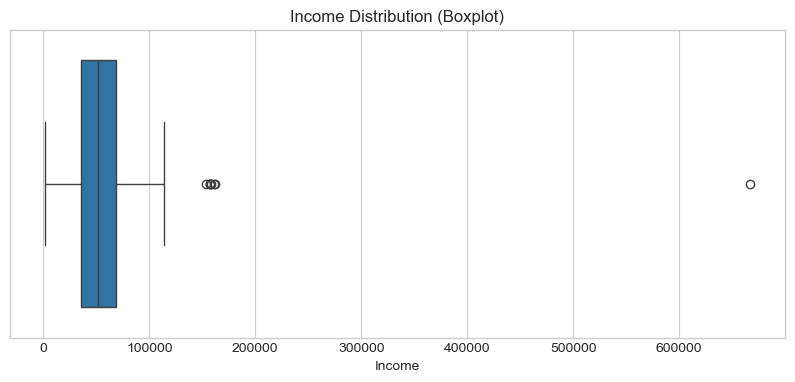

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Income'])
plt.title('Income Distribution (Boxplot)')
plt.xlabel('Income')
plt.show()


In [355]:
df[df['Income'] > 100000]


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Other,Marital_Single,Marital_Together
124,7215,1983,101970.0,0,0,12-03-2013,69,722,27,102,...,3,11,1,0,1,0,0,0,1,0
164,8475,1973,157243.0,0,1,01-03-2014,98,20,2,1582,...,3,11,0,0,0,0,1,0,0,1
203,2798,1977,102160.0,0,0,02-11-2012,54,763,29,138,...,3,11,1,0,0,0,1,0,0,1
252,10089,1974,102692.0,0,0,05-04-2013,5,168,148,444,...,3,11,1,0,1,0,0,0,0,0
617,1503,1976,162397.0,1,1,03-06-2013,31,85,1,16,...,3,11,0,0,0,0,1,0,0,1
646,4611,1970,105471.0,0,0,21-01-2013,36,1009,181,104,...,3,11,1,0,1,0,0,0,0,1
655,5555,1975,153924.0,0,0,07-02-2014,81,1,1,1,...,3,11,0,0,1,0,0,0,0,0
687,1501,1982,160803.0,0,0,04-08-2012,21,55,16,1622,...,3,11,0,0,0,0,1,0,0,1
1300,5336,1971,157733.0,1,0,04-06-2013,37,39,1,9,...,3,11,0,0,0,1,0,0,0,1
1653,4931,1977,157146.0,0,0,29-04-2013,13,1,0,1725,...,3,11,0,0,1,0,0,0,0,1


In [356]:
# 1. ตั้งค่าที่เกิน 200,000 ให้เป็น 0
df.loc[df['Income'] > 200000, 'Income'] = 0

# 2. คำนวณค่า median ใหม่ (ไม่รวม 0)
new_median = df.loc[df['Income'] != 0, 'Income'].median()

# 3. แทนที่ค่าที่เป็น 0 ด้วยค่า median ใหม่
df.loc[df['Income'] == 0, 'Income'] = new_median


In [357]:
imputer = SimpleImputer(strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])

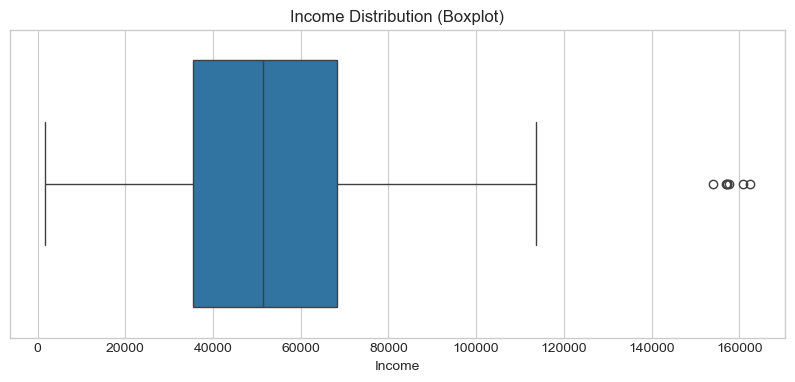

In [358]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Income'])
plt.title('Income Distribution (Boxplot)')
plt.xlabel('Income')
plt.show()

In [359]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Other,Marital_Single,Marital_Together
0,5524,1957,58138.0,0,0,04-09-2012,58,635,88,546,...,3,11,1,0,1,0,0,0,1,0
1,2174,1954,46344.0,1,1,08-03-2014,38,11,1,6,...,3,11,0,0,1,0,0,0,1,0
2,4141,1965,71613.0,0,0,21-08-2013,26,426,49,127,...,3,11,0,0,1,0,0,0,0,1
3,6182,1984,26646.0,1,0,10-02-2014,26,11,4,20,...,3,11,0,0,1,0,0,0,0,1
4,5324,1981,58293.0,1,0,19-01-2014,94,173,43,118,...,3,11,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,13-06-2013,46,709,43,182,...,3,11,0,0,1,0,0,0,0,1
2236,4001,1946,64014.0,2,1,10-06-2014,56,406,0,30,...,3,11,0,0,0,0,1,0,0,1
2237,7270,1981,56981.0,0,0,25-01-2014,91,908,48,217,...,3,11,0,0,1,0,0,0,0,0
2238,8235,1956,69245.0,0,1,24-01-2014,8,428,30,214,...,3,11,0,0,0,1,0,0,0,1


## Features engineering

In [360]:
# 1.แปลงปีเกิด เป็นอายุ
# 1.1 แปลง Dt_Customer เป็น datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
# 1.2 สร้างคอลัมน์ Age จาก Year_Birth
current_year = datetime.now().year
df['Age'] = current_year - 18 - df['Year_Birth']
df.loc[df['Age'] > 90, 'Age'] = 0
# คำนวณค่า median ใหม่ และปัดเป็นจำนวนเต็ม
new_median = round(df.loc[df['Age'] != 0, 'Age'].median())
# แทนที่ค่าที่เป็น 0 ด้วยค่า median ใหม่
df.loc[df['Age'] == 0, 'Age'] = new_median
df['Age'].unique()

array([50, 53, 42, 23, 26, 40, 36, 22, 33, 57, 24, 31, 48, 55, 20, 61, 27,
       58, 25, 28, 56, 38, 21, 18, 44, 37, 34, 64, 32, 11, 39, 43, 30, 29,
       52, 41, 19, 59, 49, 35, 47, 62, 16, 45, 54, 46, 51, 15, 17, 60, 14,
       13, 66, 63, 12, 67], dtype=int64)

In [361]:
# 2. สร้าง Total_Spend โดยการรวมยอดซื้อสินค้าทุกประเภท
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spend'] = df[spend_columns].sum(axis=1)

In [362]:
# 3. สร้าง Total_Children โดยการรวม Kidhome + Teenhome
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [363]:
# 4. สร้าง Customer_Tenure (อายุการเป็นสมาชิก) จาก Dt_Customer
# คำนวณเป็นจำนวนวัน
today = datetime.now()
df['Customer_Tenure_Days'] = (today - df['Dt_Customer']).dt.days

In [364]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Other,Marital_Single,Marital_Together,Age,Total_Spend,Total_Children,Customer_Tenure_Days
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,1,0,0,0,1,0,50,1617,0,4667
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,1,0,0,0,1,0,53,27,2,4117
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,1,0,0,0,0,1,42,776,0,4316
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,1,0,0,0,0,1,23,53,1,4143
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,1,0,0,1,26,422,1,4165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,1,0,0,0,0,1,40,1341,1,4385
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,0,0,1,0,0,1,61,444,3,4023
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,1,0,0,0,0,0,26,1241,0,4159
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,0,1,0,0,0,1,51,843,1,4160


# DATA Cluster

In [365]:
# เลือก Feature ที่จะใช้ในการแบ่งกลุ่มลูกค้า
# จะเลือกตัวแปรที่สะท้อนถึง "values" และ "พฤติกรรม" ของลูกค้า
features_for_clustering = ['Income', 'Total_Spend', 'Recency', 'Age', 'Customer_Tenure_Days']
df_cluster = df[features_for_clustering].copy()

In [366]:
df_cluster

,Income,Total_Spend,Recency,Age,Customer_Tenure_Days
0,58138.0,1617,58,50,4667
1,46344.0,27,38,53,4117
2,71613.0,776,26,42,4316
3,26646.0,53,26,23,4143
4,58293.0,422,94,26,4165
...,...,...,...,...,...
2235,61223.0,1341,46,40,4385
2236,64014.0,444,56,61,4023
2237,56981.0,1241,91,26,4159
2238,69245.0,843,8,51,4160


In [367]:
#  3. การปรับสเกลข้อมูล (Data Scaling) 
# K-Means ใช้การวัดระยะทาง ดังนั้นเราต้องปรับสเกลข้อมูลเพื่อให้ทุกตัวแปรมีน้ำหนักเท่ากัน
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

In [368]:
#  4. การหาจำนวน Cluster ที่เหมาะสมที่สุดด้วย Elbow Method 
# เราจะทดลองหาค่า K (จำนวนกลุ่ม) ที่ดีที่สุด
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

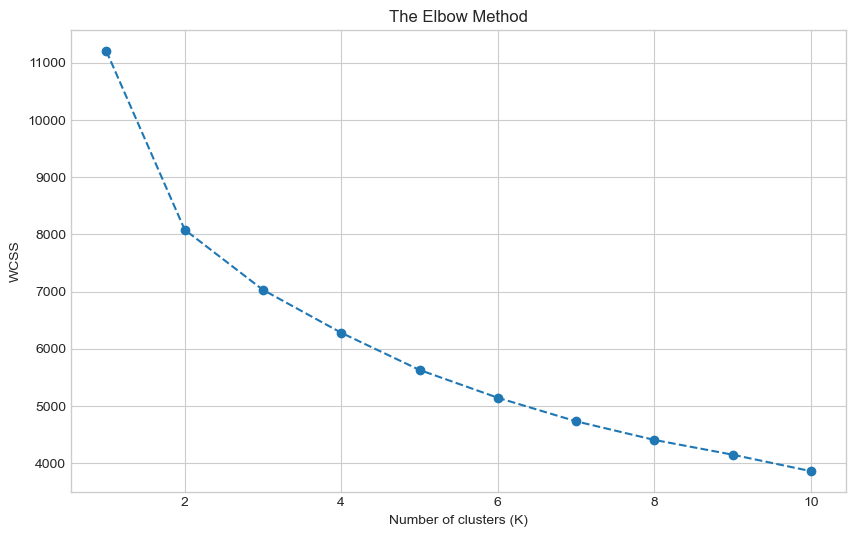

In [369]:
# พล็อตกราฟ Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [370]:
# 5. การรัน K-Means และเพิ่ม Label กลับไปที่ข้อมูลหลัก 
# เลือก K=4 จากการวิเคราะห์กราฟ Elbow
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# เพิ่มคอลัมน์ 'Cluster' กลับเข้าไปใน DataFrame หลัก
df['Cluster'] = clusters
df_cluster['Cluster'] = clusters

print(f"\nแบ่งกลุ่มลูกค้าออกเป็น {optimal_k} กลุ่มเรียบร้อยแล้ว")
print("ตัวอย่างข้อมูลพร้อม Label ของ Cluster:")
print(df[['ID', 'Cluster']].head())


แบ่งกลุ่มลูกค้าออกเป็น 4 กลุ่มเรียบร้อยแล้ว
ตัวอย่างข้อมูลพร้อม Label ของ Cluster:
     ID  Cluster
0  5524        1
1  2174        3
2  4141        1
3  6182        3
4  5324        3


In [371]:
# -- 6. การวิเคราะห์และตีความหมายของแต่ละ Cluster --
# ทำความเข้าใจว่าแต่ละกลุ่มคือใคร
cluster_analysis = df_cluster.groupby('Cluster').mean().round(2)
print("\n--- วิเคราะห์คุณลักษณะของแต่ละกลุ่ม (ค่าเฉลี่ย) ---")
print(cluster_analysis)


--- วิเคราะห์คุณลักษณะของแต่ละกลุ่ม (ค่าเฉลี่ย) ---
           Income  Total_Spend  Recency    Age  Customer_Tenure_Days
Cluster                                                             
0        34754.68       210.76    50.52  33.37               4529.47
1        65197.84       915.64    48.94  51.42               4377.83
2        75851.30      1395.52    51.25  31.32               4385.84
3        39655.34       150.30    46.51  36.02               4169.20


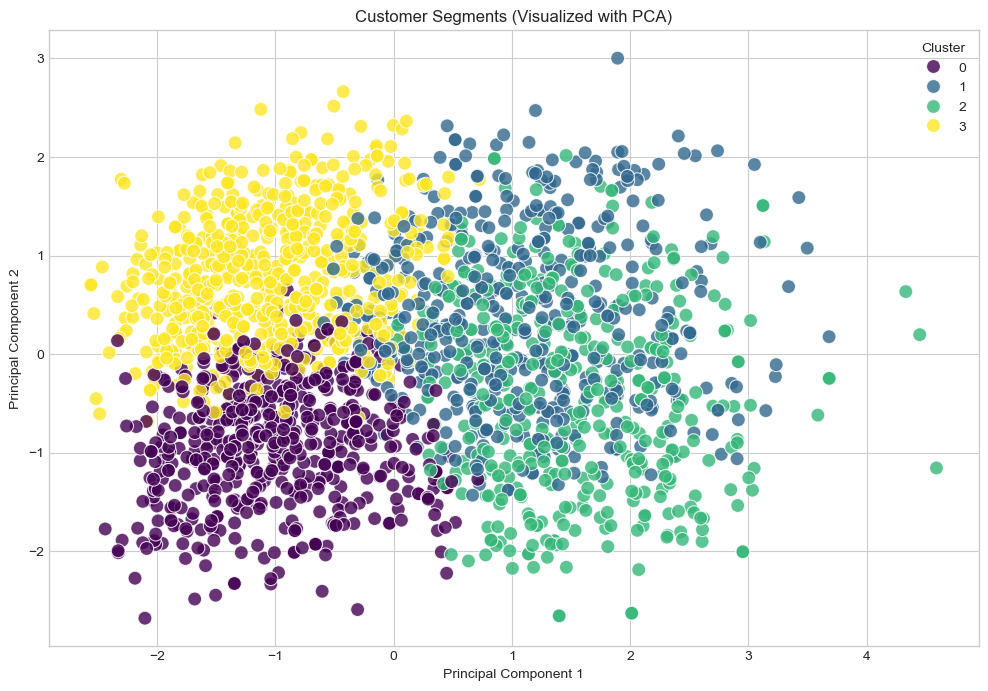

In [372]:
# -- 7. การแสดงผลด้วยภาพ (Visualization) --
# เนื่องจากเรามี > 2 มิติ เราจะใช้ PCA เพื่อลดมิติข้อมูลลงมาเหลือ 2 มิติเพื่อการพล็อต
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments (Visualized with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

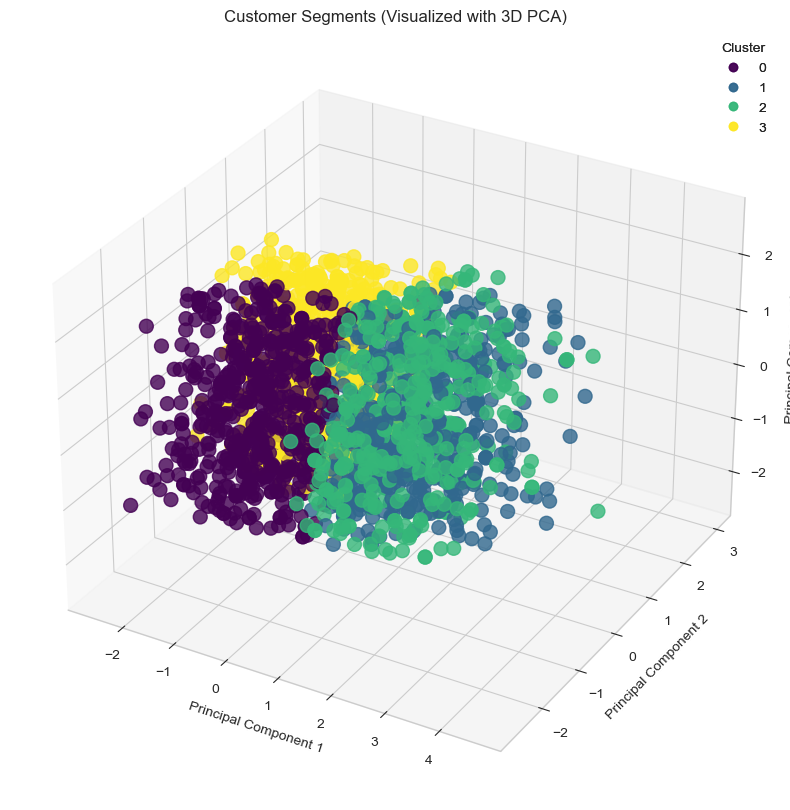

In [373]:
from mpl_toolkits.mplot3d import Axes3D  
# สำหรับ 3D plot
# ลดมิติเหลือ 3 มิติด้วย PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = clusters

# สร้างกราฟ scatter plot แบบ 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                     c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.8)

ax.set_title('Customer Segments (Visualized with 3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# เพิ่ม legend โดยใช้ค่าของ Cluster
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()


In [374]:
df1 = df.copy()

In [375]:
df = preview_and_onehot_encode(df,['Cluster'], preview_only=False, drop_first=True)

# Build Model

In [376]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Other', 'Marital_Single', 'Marital_Together', 'Age',
       'Total_Spend', 'Total_Children', 'Customer_Tenure_Days', 'Cluster_1',
       'Cluster_2', 'Cluster_3'],
      dtype='object')

In [377]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# ทำการตรวจดูการเกิด multicollinearity 
# ลิสต์คอลัมน์ทั้งหมด
columns = ['Income', 
       #     'Kidhome', 
       #     'Teenhome',
       'Recency', 
       # 'MntWines', 
       # 'MntFruits', 
       # 'MntMeatProducts',
       # 'MntFishProducts', 
       # 'MntSweetProducts',
       # 'MntGoldProds',
       'NumDealsPurchases', 
       'NumWebPurchases', 
       'NumCatalogPurchases',
       'NumStorePurchases', 
       'NumWebVisitsMonth', 
       'AcceptedCmp3',
       'AcceptedCmp4', 
       'AcceptedCmp5', 
       'AcceptedCmp1', 
       'AcceptedCmp2',
       'Complain', 
       'Z_CostContact', 
       'Z_Revenue', 
       'Response', 
       'Education_Basic',
       'Education_Graduation', 
       'Education_Master', 
       'Education_PhD',
       'Marital_Other', 
       'Marital_Single', 
       'Marital_Together', 
       'Age',
       'Total_Spend', 
       'Total_Children', 
       'Customer_Tenure_Days', 
       'Cluster_1',
       'Cluster_2', 
       'Cluster_3']

X = df[columns]
X_scaled = StandardScaler().fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                 Feature       VIF
24           Total_Spend  6.920939
0                 Income  4.567105
28             Cluster_2  4.347348
27             Cluster_1  3.837152
17  Education_Graduation  3.322325
4    NumCatalogPurchases  3.076128
29             Cluster_3  2.824707
19         Education_PhD  2.795658
6      NumWebVisitsMonth  2.718952
18      Education_Master  2.428910
5      NumStorePurchases  2.359536
26  Customer_Tenure_Days  2.229496
21        Marital_Single  2.095639
22      Marital_Together  2.086461
25        Total_Children  2.012530
23                   Age  1.974708
3        NumWebPurchases  1.846335
2      NumDealsPurchases  1.694046
9           AcceptedCmp5  1.622837
15              Response  1.495759
10          AcceptedCmp1  1.375424
16       Education_Basic  1.310492
8           AcceptedCmp4  1.277953
7           AcceptedCmp3  1.149112
11          AcceptedCmp2  1.148813
1                Recency  1.068746
20         Marital_Other  1.017853
12              Comp

c:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [378]:
# คอลัมน์ที่ถูกเลือก เพื่อที่จะนำไปสร้าง model
columns = ['Income', 
       'Recency', 
       'NumDealsPurchases', 
       'NumWebPurchases', 
       'NumCatalogPurchases',
       'NumStorePurchases', 
       'NumWebVisitsMonth', 
       'AcceptedCmp3',
       'AcceptedCmp4', 
       'AcceptedCmp5', 
       'AcceptedCmp1', 
       'AcceptedCmp2',
       'Complain', 
       'Education_Basic',
       'Education_Graduation', 
       'Education_Master', 
       'Education_PhD',
       'Marital_Other', 
       'Marital_Single', 
       'Marital_Together', 
       'Age',
       'Total_Spend', 
       'Total_Children', 
       'Customer_Tenure_Days', 
       'Cluster_1',
       'Cluster_2', 
       'Cluster_3',
       ]

In [379]:
X = df[columns].copy()
y = df['Response']

In [380]:
# เช็คดูแต่ละคลาสของตัวแปร target
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [381]:
# Preprocessing
# เนื่องจากข้อมูลที่เป็นข้อความได้ถูกแปลงเป็น 0/1 แล้ว เราจะจัดการแค่ข้อมูลตัวเลข
# ดึงคอลัมน์ตัวเลขทั้งหมด
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
# แยก numeric_features: เป็นตัวเลขที่มีค่ามากกว่าแค่ 0 กับ 1
numeric_features = [col for col in numeric_cols if not set(X[col].dropna().unique()).issubset({0, 1})]
# แยก binary_features: ตัวเลขที่เป็น 0/1 ซึ่งไม่ต้องทำอะไร เช่น คอลัมน์ที่ผ่าน One-Hot มาแล้ว
# เราจะให้มัน "passthrough" คือไม่ทำอะไรกับมันเลย
binary_features = [col for col in numeric_cols if set(X[col].dropna().unique()).issubset({0, 1})]

print(f"\nNumeric features to scale: {numeric_features}")
print(f"\nBinary features to passthrough: {binary_features}")

# สร้าง Pipeline สำหรับ Preprocessing
# สำหรับข้อมูลตัวเลข: จัดการค่าว่าง และปรับสเกล
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# รวม Pipeline ทั้งสองเข้าด้วยกัน
# สำหรับ binary_features เราจะใช้ 'passthrough' เพื่อให้ข้อมูลส่วนนี้ไม่ถูกเปลี่ยนแปลง
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', 'passthrough', binary_features) # ใช้ 'passthrough' สำหรับคอลัมน์ 0/1
    ],
    remainder='drop' # ทิ้งคอลัมน์ที่ไม่ได้ระบุไว้
)


Numeric features to scale: ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Spend', 'Total_Children', 'Customer_Tenure_Days']

Binary features to passthrough: ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Other', 'Marital_Single', 'Marital_Together', 'Cluster_1', 'Cluster_2', 'Cluster_3']


In [382]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Income', 'Recency', 'NumDealsPurchases',
                                  'NumWebPurchases', 'NumCatalogPurchases',
                                  'NumStorePurchases', 'NumWebVisitsMonth',
                                  'Age', 'Total_Spend', 'Total_Children',
                                  'Customer_Tenure_Days']),
                                ('bin', 'passthrough',
                                 ['AcceptedCmp3', 'AcceptedCmp4',
                                  'AcceptedCmp5', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'Complain', 'Education_Basic',
                                  'Education_Graduation', 'Education_Master',
                                  'Education_PhD', 'Marital_Other',
                                  'Marital_Single', 'Marital_Together',
                                  'Cluster_1', 'Cluster_2', 'Cluster_3'])])

In [383]:
# การแบ่งข้อมูล และสร้าง Pipeline ของโมเดล
# spilt ข้อมูลเป็น Train (80%) และ Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# สร้าง Pipeline ที่รวมขั้นตอน Preprocessing และการสร้างโมเดลไว้ด้วยกัน
# โดยเราจะทำการสร้าง 2 models เพื่อเปรียบเทียบกัน
# โมเดลที่ 1: Logistic Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))])

# โมเดลที่ 2: Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])



--- Evaluating with 5-Fold Cross-Validation: Logistic Regression ---
Cross-Validation Accuracy Scores: [0.81615599 0.8356546  0.81564246 0.83240223 0.77653631]
Mean CV Accuracy: 0.8153 (+/- 0.0210)

--- Training final model and evaluating on the hold-out test set: Logistic Regression ---
Final Test Set Accuracy: 0.8170

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       381
           1       0.44      0.78      0.56        67

    accuracy                           0.82       448
   macro avg       0.70      0.80      0.72       448
weighted avg       0.88      0.82      0.84       448



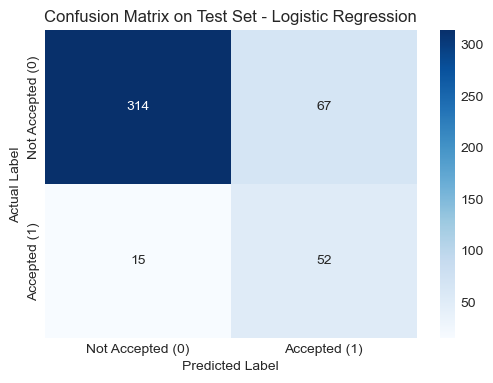


--- Evaluating with 5-Fold Cross-Validation: Random Forest ---
Cross-Validation Accuracy Scores: [0.8913649  0.88857939 0.88268156 0.87709497 0.88268156]
Mean CV Accuracy: 0.8845 (+/- 0.0050)

--- Training final model and evaluating on the hold-out test set: Random Forest ---
Final Test Set Accuracy: 0.8862

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       381
           1       0.77      0.34      0.47        67

    accuracy                           0.89       448
   macro avg       0.83      0.66      0.71       448
weighted avg       0.88      0.89      0.87       448



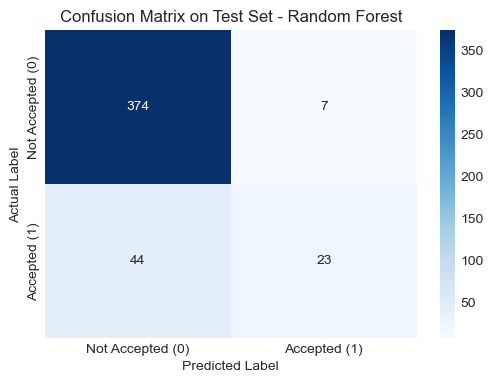

In [384]:
# ทำ 5-Fold Cross-Validation

models = {
    "Logistic Regression": lr_pipeline,
    "Random Forest": rf_pipeline
}

for name, model in models.items():
    print(f"\n--- Evaluating with 5-Fold Cross-Validation: {name} ---")

    # ประเมินโมเดลด้วย cross-validation บนชุดข้อมูล train เท่านั้น
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # ฝึกโมเดลสุดท้ายด้วยข้อมูล train ทั้งหมด
    print(f"\n--- Training final model and evaluating on the hold-out test set: {name} ---")
    model.fit(X_train, y_train)

    # ทดสอบโมเดลสุดท้ายบน test set (20%) ที่เก็บเอาไว้
    y_pred = model.predict(X_test)

    # evaluate บน Test Set
    print(f"Final Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, y_pred))

    # พล็อตกราฟ Confusion Matrix ของ Test Set
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Accepted (0)', 'Accepted (1)'],
                yticklabels=['Not Accepted (0)', 'Accepted (1)'])
    plt.title(f'Confusion Matrix on Test Set - {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# SHAP
- เพื่อให้สามารถรู้ได้ว่า ตัวแปรใดบ้างที่มีอิทธิพลต่อการทำนายของ model
- เนื่องจาก random forest ให้ perfoemance ที่ดีที่สุด จึงจะใช้ shap สำหรับโมเดลนี้

In [385]:
#  SHAP Analysis สำหรับการอธิบายโมเดล

def create_shap_analysis_rf(model, X_train, X_test, model_name="Random Forest"):
    """
    สร้าง SHAP analysis สำหรับ Random Forest model ที่ใช้ pipeline
    
    Parameters:
    - model: trained pipeline model (Random Forest)
    - X_train: training data (ก่อน preprocessing)
    - X_test: test data (ก่อน preprocessing) 
    - model_name: ชื่อโมเดล
    """
    
    print(f"\n=== SHAP Analysis for {model_name} ===")
    
    # 1. เตรียมข้อมูลหลัง preprocessing
    preprocessor = model.named_steps['preprocessor']
    classifier = model.named_steps['classifier']
    
    # แปลงข้อมูล train และ test
    X_train_processed = preprocessor.transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # 2. สร้างชื่อ features หลัง preprocessing
    feature_names = get_feature_names_from_preprocessor(preprocessor, X_train.columns)
    
    # แปลงเป็น DataFrame เพื่อให้ง่ายต่อการใช้งาน
    X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
    X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)
    
    print(f"Shape after preprocessing: {X_train_df.shape}")
    print(f"Number of features: {len(feature_names)}")
    print(f"Feature names: {feature_names[:5]}..." if len(feature_names) > 5 else f"Feature names: {feature_names}")
    
    # 3. สร้าง SHAP TreeExplainer สำหรับ Random Forest
    print("\nCreating SHAP TreeExplainer...")
    explainer = shap.TreeExplainer(classifier)
    
    print("Calculating SHAP values...")
    shap_values = explainer.shap_values(X_test_df)
    
    print(f"Debug - SHAP values type: {type(shap_values)}")
    if isinstance(shap_values, list):
        print(f"Debug - SHAP values list length: {len(shap_values)}")
        for i, sv in enumerate(shap_values):
            print(f"Debug - Element {i} shape: {np.array(sv).shape}")
    else:
        print(f"Debug - SHAP values shape: {np.array(shap_values).shape}")
    
    # จัดการ SHAP values สำหรับ binary classification
    if isinstance(shap_values, list) and len(shap_values) == 2:
        # ใช้ shap values สำหรับ positive class (class 1)
        shap_values = np.array(shap_values[1])
        print(f"Selected positive class SHAP values shape: {shap_values.shape}")
    elif isinstance(shap_values, list):
        shap_values = np.array(shap_values[0])
        print(f"Selected first class SHAP values shape: {shap_values.shape}")
    else:
        shap_values = np.array(shap_values)
        print(f"SHAP values shape: {shap_values.shape}")
    
    # ตรวจสอบและปรับ shape ถ้าจำเป็น
    if shap_values.ndim == 3:
        if shap_values.shape[2] == 1:
            shap_values = shap_values[:, :, 0]
        else:
            shap_values = shap_values[:, :, -1]  # เอา positive class
        print(f"Adjusted SHAP values shape: {shap_values.shape}")
    
    # 4. สร้างกราห์ต่างๆ
    
    # Feature Importance Bar Plot
    try:
        print("\nCreating Feature Importance Bar Plot...")
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_test_df, plot_type="bar", show=False)
        plt.title(f'SHAP Feature Importance - {model_name}')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Warning: Could not create bar plot: {str(e)}")
    
    # Summary Plot (Bee Swarm)
    try:
        print("Creating SHAP Summary Plot...")
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_test_df, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Warning: Could not create summary plot: {str(e)}")
    
    # Waterfall plot สำหรับตัวอย่างแรก
    try:
        print("Creating Waterfall Plot for first sample...")
        plt.figure(figsize=(12, 6))
        
        # เตรียมข้อมูลสำหรับ waterfall plot
        sample_shap = shap_values[0]  # ตัวอย่างแรก
        sample_data = X_test_df.iloc[0]
        
        # จัดการ expected_value
        base_val = explainer.expected_value
        if isinstance(base_val, (list, np.ndarray)):
            if len(base_val) == 2:
                base_val = base_val[1]  # positive class
            else:
                base_val = base_val[0]
        
        # สร้าง waterfall plot
        if hasattr(shap, 'Explanation'):
            # สำหรับ SHAP version ใหม่
            explanation = shap.Explanation(
                values=sample_shap.reshape(1, -1), 
                base_values=base_val, 
                data=sample_data.values.reshape(1, -1),
                feature_names=feature_names
            )
            shap.plots.waterfall(explanation[0])
        else:
            # สำหรับ SHAP version เก่า
            shap.waterfall_plot(base_val, sample_shap, sample_data)
            
        
    except Exception as e:
        print(f"Warning: Could not create waterfall plot: {str(e)}")
    
    
    # 5. แสดง Feature Importance Table
    try:
        print("Calculating Feature Importance...")
        
        if shap_values.ndim == 2:
            feature_importance = np.abs(shap_values).mean(0)
        else:
            feature_importance = np.abs(shap_values.flatten())
        
        # ตรวจสอบขนาด
        if len(feature_importance) != len(feature_names):
            min_len = min(len(feature_importance), len(feature_names))
            feature_importance = feature_importance[:min_len]
            feature_names_subset = feature_names[:min_len]
        else:
            feature_names_subset = feature_names
        
        # สร้าง DataFrame สำหรับ feature importance
        importance_df = pd.DataFrame({
            'Feature': feature_names_subset,
            'SHAP_Importance': feature_importance
        }).sort_values('SHAP_Importance', ascending=False)
        
        # แสดง Top 15 features
        print(f"\n{'='*60}")
        print(f"Top 15 Most Important Features - {model_name}")
        print('='*60)
        print(f"{'Rank':<4} {'Feature':<30} {'SHAP Importance':<15}")
        print('-'*60)
        
        for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
            print(f"{i:<4} {row['Feature']:<30} {row['SHAP_Importance']:<15.4f}")
        
        # สร้างกราฟ Top 15 features
        plt.figure(figsize=(10, 8))
        top_15 = importance_df.head(15)
        plt.barh(range(len(top_15)), top_15['SHAP_Importance'])
        plt.yticks(range(len(top_15)), top_15['Feature'])
        plt.xlabel('Mean |SHAP Value|')
        plt.title(f'Top 15 Feature Importance - {model_name}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        return shap_values, feature_names, X_test_df, importance_df
        
    except Exception as e:
        print(f"Warning: Could not calculate feature importance: {str(e)}")
        return shap_values, feature_names, X_test_df, None

In [386]:
def get_feature_names_from_preprocessor(preprocessor, original_columns):
    """
    ดึงชื่อ features หลังจาก preprocessing
    """
    feature_names = []
    
    for name, transformer, columns in preprocessor.transformers_:
        if name == 'num':
            # สำหรับ numeric features
            feature_names.extend(columns)
        elif name == 'bin':
            # สำหรับ binary features (passthrough)
            feature_names.extend(columns)
    
    return feature_names


 SHAP Analysis for Random Forest 

=== SHAP Analysis for Random Forest ===
Shape after preprocessing: (1792, 27)
Number of features: 27
Feature names: ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases']...

Creating SHAP TreeExplainer...
Calculating SHAP values...
Debug - SHAP values type: <class 'numpy.ndarray'>
Debug - SHAP values shape: (448, 27, 2)
SHAP values shape: (448, 27, 2)
Adjusted SHAP values shape: (448, 27)

Creating Feature Importance Bar Plot...


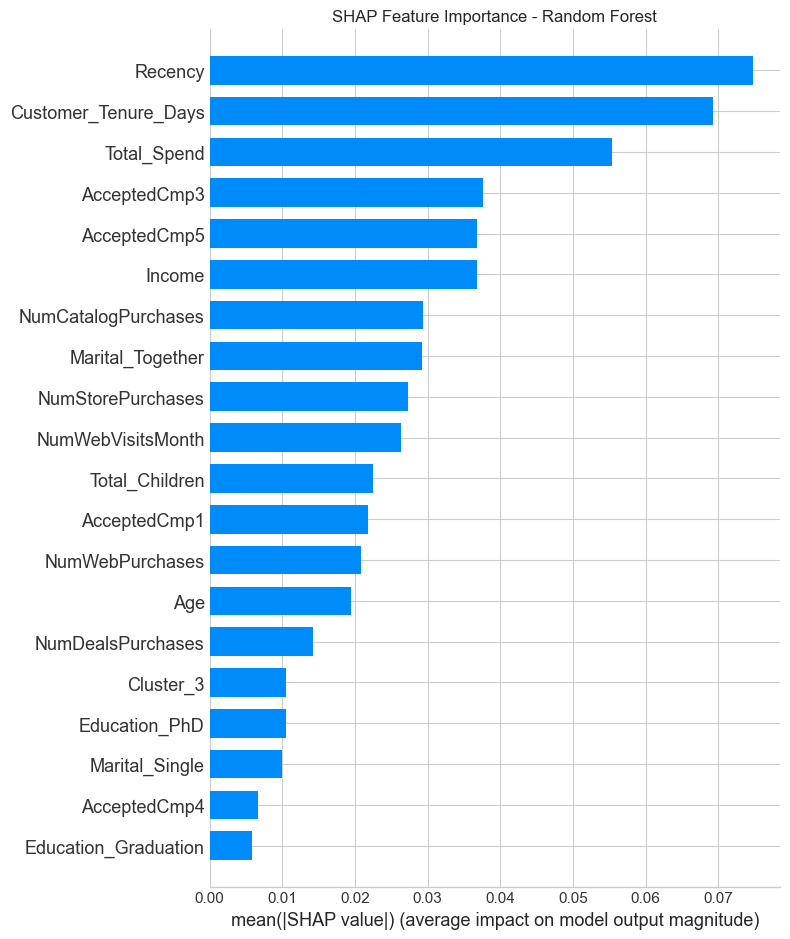

Creating SHAP Summary Plot...


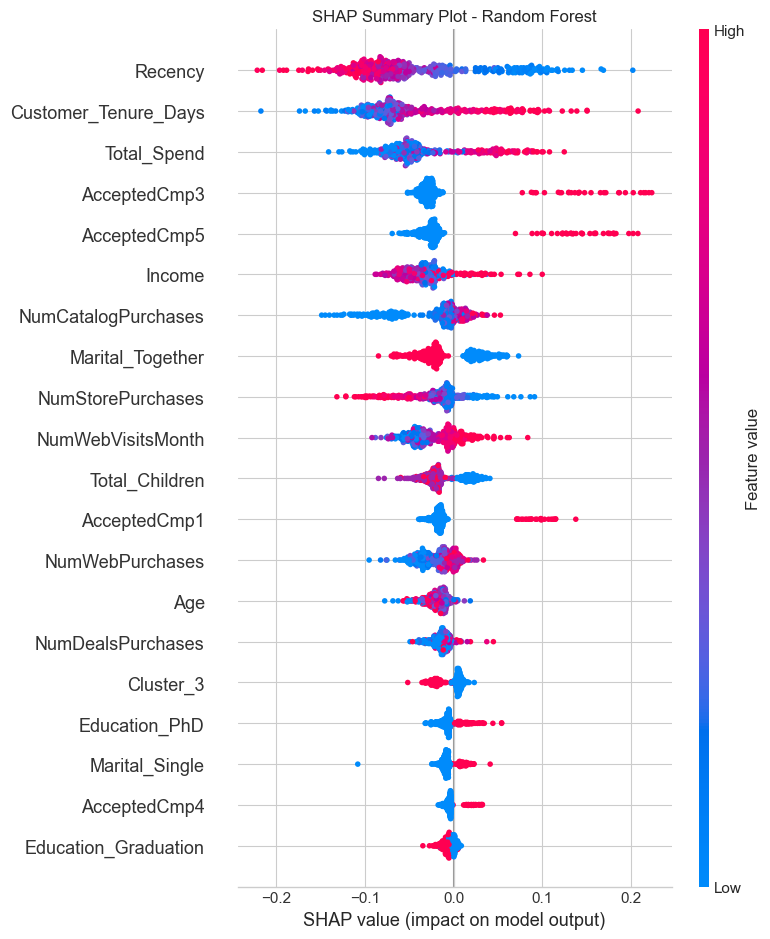

Creating Waterfall Plot for first sample...


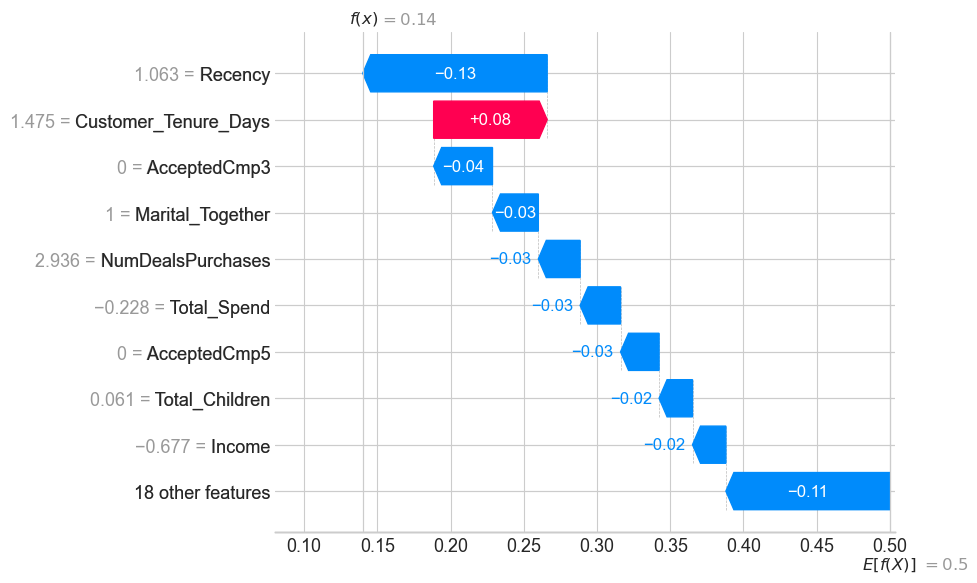

Calculating Feature Importance...

Top 15 Most Important Features - Random Forest
Rank Feature                        SHAP Importance
------------------------------------------------------------
1    Recency                        0.0748         
2    Customer_Tenure_Days           0.0692         
3    Total_Spend                    0.0554         
4    AcceptedCmp3                   0.0376         
5    AcceptedCmp5                   0.0368         
6    Income                         0.0368         
7    NumCatalogPurchases            0.0294         
8    Marital_Together               0.0292         
9    NumStorePurchases              0.0273         
10   NumWebVisitsMonth              0.0263         
11   Total_Children                 0.0225         
12   AcceptedCmp1                   0.0218         
13   NumWebPurchases                0.0208         
14   Age                            0.0194         
15   NumDealsPurchases              0.0143         


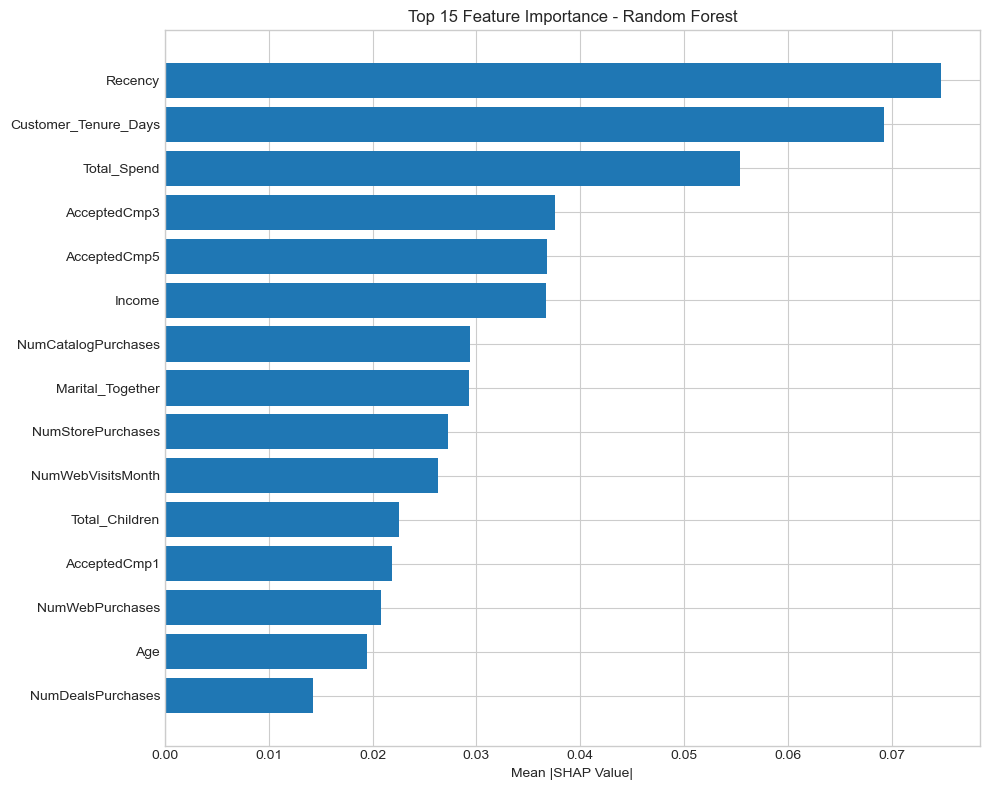


 SHAP analysis completed successfully for Random Forest!

 Additional Statistics:
- Total features analyzed: 27
- Average SHAP importance: 0.0214
- Max SHAP importance: 0.0748
- Min SHAP importance: 0.0000
- Top 5 features contribute: 47.3% of total importance

 SHAP Analysis Complete!


In [387]:
# ตรวจสอบว่าโมเดลได้ถูกเทรนแล้ว
if 'models' in locals() and 'Random Forest' in models:
    print(f"\n{'='*70}")
    print(" SHAP Analysis for Random Forest ")
    print('='*70)
    
    try:
        rf_model = models['Random Forest']
        
        # สร้าง SHAP analysis สำหรับ Random Forest
        shap_values, feature_names, X_test_processed, importance_df = create_shap_analysis_rf(
            rf_model, X_train, X_test, "Random Forest"
        )
        
        print(f"\n SHAP analysis completed successfully for Random Forest!")
        
        # แสดงสถิติเพิ่มเติม
        if importance_df is not None:
            print(f"\n Additional Statistics:")
            print(f"- Total features analyzed: {len(feature_names)}")
            print(f"- Average SHAP importance: {importance_df['SHAP_Importance'].mean():.4f}")
            print(f"- Max SHAP importance: {importance_df['SHAP_Importance'].max():.4f}")
            print(f"- Min SHAP importance: {importance_df['SHAP_Importance'].min():.4f}")
            
            # แสดงสัดส่วนของ top 5 features
            top_5_sum = importance_df.head(5)['SHAP_Importance'].sum()
            total_sum = importance_df['SHAP_Importance'].sum()
            print(f"- Top 5 features contribute: {(top_5_sum/total_sum)*100:.1f}% of total importance")
        
    except Exception as e:
        print(f" Error in SHAP analysis for Random Forest: {str(e)}")
        print(f"Error type: {type(e).__name__}")
        import traceback
        print("Full traceback:")
        traceback.print_exc()
        
elif 'models' not in locals():
    print(" Error: Models not found. Please run the model training code first.")
else:
    print(" Error: Random Forest model not found in models dictionary.")

print(f"\n{'='*70}")
print(" SHAP Analysis Complete!")
print('='*70)

# Persona

In [ ]:
df = df1.copy()

In [ ]:
persona_map = {
    0: 'Everyday Customers',
    1: 'The Loyalists',
    2: 'The VIPs',
    3: 'The Savers'
}
df['Persona'] = df['Cluster'].map(persona_map)

In [ ]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_PhD,Marital_Other,Marital_Single,Marital_Together,Age,Total_Spend,Total_Children,Customer_Tenure_Days,Cluster,Persona
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,1,0,50,1617,0,4667,1,The Loyalists
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,1,0,53,27,2,4117,3,The Savers
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,1,42,776,0,4316,1,The Loyalists
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,1,23,53,1,4143,3,The Savers
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,1,0,0,1,26,422,1,4165,3,The Savers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,1,40,1341,1,4385,2,The VIPs
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,1,0,0,1,61,444,3,4023,1,The Loyalists
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,0,0,0,0,26,1241,0,4159,2,The VIPs
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,0,0,0,1,51,843,1,4160,1,The Loyalists



--- ผลการวิเคราะห์พฤติกรรมของแต่ละ Persona (ค่าเฉลี่ย) ---
              Persona  NumWebPurchases  NumStorePurchases  NumDealsPurchases
0  Everyday Customers         3.144330           3.938144           2.731959
1       The Loyalists         5.758303           7.769373           2.540590
2          The Savers         2.598784           3.840426           2.161094
3            The VIPs         5.434498           8.602620           1.788210


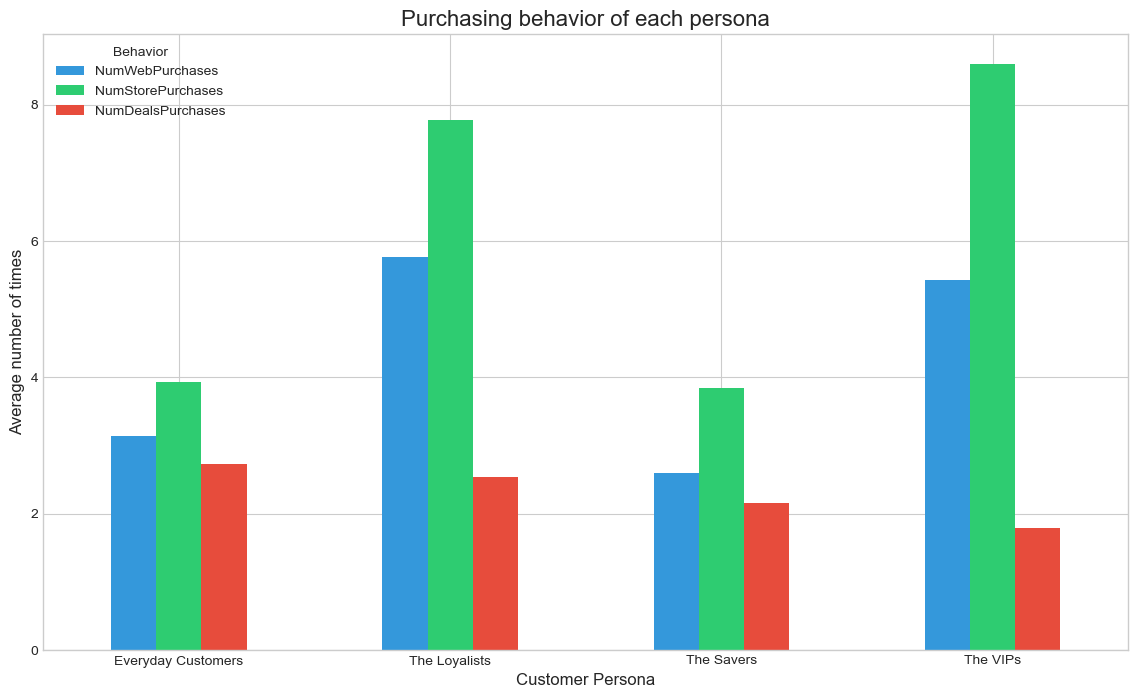


--- สรุป Insight จากกราฟ ---
1. ช่องทางการซื้อ:
   - The VIPs และ The Loyalists เป็นกลุ่มที่ซื้อผ่านทุกช่องทางในระดับสูง แต่ดูเหมือนจะเด่นที่การซื้อหน้าร้าน (NumStorePurchases)
   - The Savers และ Everyday Customers ซื้อผ่านเว็บและหน้าร้านในระดับที่น้อยกว่ามาก

2. การตอบสนองต่อส่วนลด (Deals):
   - ทุกกลุ่มมีการซื้อผ่านดีลในระดับที่ไม่สูงนัก แต่กลุ่มที่ดูจะสนใจดีลมากที่สุดเมื่อเทียบกับพฤติกรรมอื่นๆ คือ Everyday Customers และ The Loyalists



In [ ]:
# คำนวณค่าเฉลี่ยของพฤติกรรมที่น่าสนใจในแต่ละกลุ่ม
behavior_analysis = df.groupby('Persona')[[
    'NumWebPurchases',
    'NumStorePurchases',
    'NumDealsPurchases'
]].mean().reset_index()

print("\n--- ผลการวิเคราะห์พฤติกรรมของแต่ละ Persona (ค่าเฉลี่ย) ---")
print(behavior_analysis)

# แสดงผลด้วยภาพเพื่อให้เข้าใจง่าย
plt.style.use('seaborn-v0_8-whitegrid')
behavior_analysis.set_index('Persona').plot(kind='bar', figsize=(14, 8),
                                             color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('Purchasing behavior of each persona', fontsize=16)
plt.ylabel('Average number of times', fontsize=12)
plt.xlabel('Customer Persona', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Behavior')
plt.show()

print("""
--- สรุป Insight จากกราฟ ---
1. ช่องทางการซื้อ:
   - The VIPs และ The Loyalists เป็นกลุ่มที่ซื้อผ่านทุกช่องทางในระดับสูง แต่ดูเหมือนจะเด่นที่การซื้อหน้าร้าน (NumStorePurchases)
   - The Savers และ Everyday Customers ซื้อผ่านเว็บและหน้าร้านในระดับที่น้อยกว่ามาก

2. การตอบสนองต่อส่วนลด (Deals):
   - ทุกกลุ่มมีการซื้อผ่านดีลในระดับที่ไม่สูงนัก แต่กลุ่มที่ดูจะสนใจดีลมากที่สุดเมื่อเทียบกับพฤติกรรมอื่นๆ คือ Everyday Customers และ The Loyalists
""")


In [ ]:
# 2.1 ฝึกโมเดล Random Forest 
# เราจะใช้ข้อมูลทั้งหมด (ยกเว้น ID และ Persona) เพื่อสร้างโมเดล
y = df['Response']
mnt_cols = [col for col in df.columns if 'Mnt' in col]
features_to_drop = ['ID', 'Response', 'Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome', 'Persona', 'Cluster'] + mnt_cols
# สมมติว่ามีการทำ OneHot Encoding กับ Education และ Marital_Status แล้ว
df_model = pd.get_dummies(df)

X = df_model.drop(columns=[col for col in features_to_drop if col in df_model.columns])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล (ใช้แค่ Scaler เพราะทุกอย่างเป็นตัวเลขแล้ว)
model = Pipeline(steps=[('scaler', StandardScaler()),
                        ('classifier', RandomForestClassifier(random_state=42))])
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
df_model

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Together,Age,Total_Spend,Total_Children,Customer_Tenure_Days,Cluster,Persona_Everyday Customers,Persona_The Loyalists,Persona_The Savers,Persona_The VIPs
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,50,1617,0,4667,1,False,True,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,53,27,2,4117,3,False,False,True,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,1,42,776,0,4316,1,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,1,23,53,1,4143,3,False,False,True,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,1,26,422,1,4165,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,1,40,1341,1,4385,2,False,False,False,True
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,1,61,444,3,4023,1,False,True,False,False
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,0,26,1241,0,4159,2,False,False,False,True
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,1,51,843,1,4160,1,False,True,False,False


In [ ]:
# 2.2 ทำนายความน่าจะเป็นของลูกค้าทั้งหมด
# เราจะใช้ข้อมูลทั้งชุดเพื่อจำลองสถานการณ์จริง
all_predictions = model.predict_proba(X)[:, 1] # เอาความน่าจะเป็นของ Class 1 (ตอบรับ)
df['Probability'] = all_predictions

In [ ]:
# 2.3 ตั้งค่าการจำลอง
# สมมติ เรามีงบประมาณอยู่ 100000 บาท เราจะใช้งบนี้อย่างไรในการยิงแอด เพื่อให้เกิดประโยชน์สูงสุด
BUDGET = 100000  # บาท
COST_PER_ACQUISITION = 50 # บาท (ค่ายิงแอดต่อคน)
REVENUE_PER_CONVERSION = 500 # บาท (รายได้เฉลี่ยเมื่อลูกค้า 1 คนตอบรับ)
PEOPLE_TO_TARGET = int(BUDGET / COST_PER_ACQUISITION)

print(f"\n--- การจำลองกลยุทธ์การตลาด (Budget: {BUDGET:,} บาท) ---")
print(f"สามารถส่งโฆษณาหาลูกค้าได้: {PEOPLE_TO_TARGET:,} คน")



--- การจำลองกลยุทธ์การตลาด (Budget: 100,000 บาท) ---
สามารถส่งโฆษณาหาลูกค้าได้: 2,000 คน


In [ ]:
# 2.4 จำลองกลยุทธ์ A: การตลาดแบบสุ่ม (Mass Marketing)
random_sample = df.sample(n=PEOPLE_TO_TARGET, random_state=42)
random_conversions = random_sample['Response'].sum()
random_revenue = random_conversions * REVENUE_PER_CONVERSION
random_roi = ((random_revenue - BUDGET) / BUDGET) * 100

# 2.5 จำลองกลยุทธ์ B: การตลาดแบบเจาะจงด้วยโมเดล (Targeted Marketing)
targeted_sample = df.sort_values(by='Probability', ascending=False).head(PEOPLE_TO_TARGET)
targeted_conversions = targeted_sample['Response'].sum()
targeted_revenue = targeted_conversions * REVENUE_PER_CONVERSION
targeted_roi = ((targeted_revenue - BUDGET) / BUDGET) * 100

In [ ]:

# 2.6 สรุปผลการจำลอง
print("\n--- ผลลัพธ์การเปรียบเทียบ ROI ---")
print("="*35)
print("กลยุทธ์ A: การตลาดแบบ Random")
print(f"  - จำนวนผู้ตอบรับที่คาดหวัง: {random_conversions} คน")
print(f"  - รายรับที่คาดหวัง: {random_revenue:,.2f} บาท")
print(f"  - ROI: {random_roi:.2f}%")
print("-"*35)
print("กลยุทธ์ B: การตลาดแบบ Targeted")
print(f"  - จำนวนผู้ตอบรับที่คาดหวัง: {targeted_conversions} คน")
print(f"  - รายรับที่คาดหวัง: {targeted_revenue:,.2f} บาท")
print(f"  - ROI: {targeted_roi:.2f}%")
print("="*35)
print(f"\nสรุป: การใช้โมเดลเพื่อเจาะจงกลุ่มเป้าหมายสามารถเพิ่มจำนวนผู้ตอบรับได้ถึง {(targeted_conversions/random_conversions)-1:.2%} และเพิ่ม ROI ได้อย่างมีนัยสำคัญ!")




--- ผลลัพธ์การเปรียบเทียบ ROI ---
กลยุทธ์ A: การตลาดแบบสุ่ม (Random)
  - จำนวนผู้ตอบรับที่คาดหวัง: 294 คน
  - รายรับที่คาดหวัง: 147,000.00 บาท
  - ROI: 47.00%
-----------------------------------
กลยุทธ์ B: การตลาดแบบเจาะจง (Targeted)
  - จำนวนผู้ตอบรับที่คาดหวัง: 334 คน
  - รายรับที่คาดหวัง: 167,000.00 บาท
  - ROI: 67.00%

สรุป: การใช้โมเดลเพื่อเจาะจงกลุ่มเป้าหมายสามารถเพิ่มจำนวนผู้ตอบรับได้ถึง 13.61% และเพิ่ม ROI ได้อย่างมีนัยสำคัญ!
